<a href="https://colab.research.google.com/github/Khyatikhurana/EDA/blob/main/EDA_THEORY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: KHYATI KHURANA**\
**REG NO: 21BDS0349**

DATA CLEANING

In [2]:
print("Khyati Khurana - 21BDS0349")
# Step 1: Load the dataset
import pandas as pd

file_path = '/content/sample_data/superbowl_commercials.csv'
data = pd.read_csv(file_path)

# Display the first few rows and check initial data types
print("Initial Data Preview:")
print(data.head())
print("\nData Types:")
print(data.dtypes)


Khyati Khurana - 21BDS0349
Initial Data Preview:
   Year      Brand                                 Superbowl Ads Link  \
0  2000    E-Trade  https://superbowl-ads.com/2000-etrade-monkey-d...   
1  2000    E-Trade  https://superbowl-ads.com/2000-etrade-money-ou...   
2  2000  Budweiser  https://superbowl-ads.com/2000-budweiser-whaas...   
3  2000  Bud Light  https://superbowl-ads.com/2000-bud-light-hold-...   
4  2000  Budweiser  https://superbowl-ads.com/2000-budweiser-talki...   

                                  Youtube Link  Funny  Shows Product Quickly  \
0  https://www.youtube.com/watch?v=Muyq2kMDFoA   True                   True   
1  https://www.youtube.com/watch?v=oftjwYmlfoA   True                   True   
2  https://www.youtube.com/watch?v=loimTUjV92Q   True                   True   
3  https://www.youtube.com/watch?v=M3IV93HwSkc   True                   True   
4  https://www.youtube.com/watch?v=dK1tlG778J8   True                  False   

   Patriotic  Celebrity  Danger

In [3]:
# Step 2: Check for Missing Values
print("\nMissing Values Count:")
print(data.isnull().sum())

# Optionally display percentage of missing values
missing_percentage = data.isnull().sum() / len(data) * 100
print("\nMissing Values Percentage:")
print(missing_percentage)

# Handling missing values (example: drop rows with missing values)
data = data.dropna()  # This drops all rows with any missing values
# Alternatively, fill missing values with a placeholder, mean, or median:
# data.fillna(value={'Column_Name': 'Unknown'}, inplace=True)  # Replace with specific values per column



Missing Values Count:
Year                      0
Brand                     0
Superbowl Ads Link        0
Youtube Link              9
Funny                     0
Shows Product Quickly     0
Patriotic                 0
Celebrity                 0
Danger                    0
Animals                   0
Uses Sex                  0
Length                    0
Estimated Cost            0
Youtube Views            12
Youtube Likes            18
TV Viewers                0
dtype: int64

Missing Values Percentage:
Year                     0.000000
Brand                    0.000000
Superbowl Ads Link       0.000000
Youtube Link             3.614458
Funny                    0.000000
Shows Product Quickly    0.000000
Patriotic                0.000000
Celebrity                0.000000
Danger                   0.000000
Animals                  0.000000
Uses Sex                 0.000000
Length                   0.000000
Estimated Cost           0.000000
Youtube Views            4.819277
Youtube Like

In [4]:
# Step 3: Remove Duplicates
print("\nNumber of Duplicate Rows:", data.duplicated().sum())

# Drop duplicate rows
data = data.drop_duplicates()

# Check data dimensions after removing duplicates
print("\nData Dimensions After Removing Duplicates:", data.shape)



Number of Duplicate Rows: 0

Data Dimensions After Removing Duplicates: (231, 16)


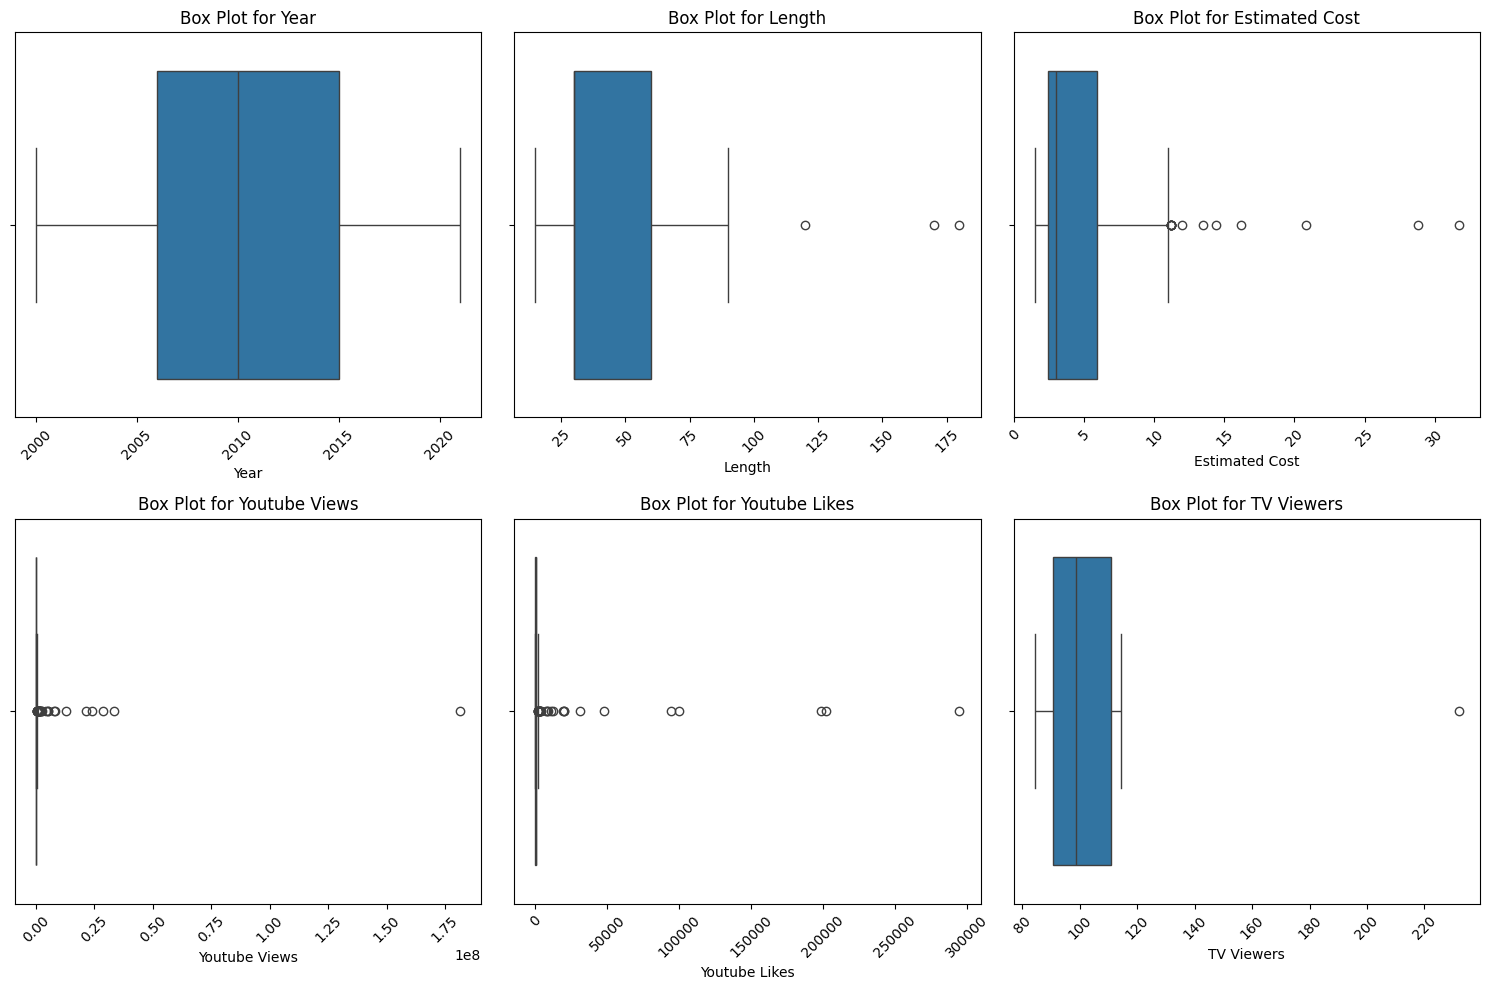


Data Dimensions After Removing Outliers: (166, 16)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers for numerical columns using boxplots in a grid layout
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Define the number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(numerical_columns) // n_cols)  # Calculate rows dynamically

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust grid size
axes = axes.flatten()  # Flatten axes array for easier iteration

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Example: Removing outliers using the IQR method for each numerical column
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    # Filter out rows with outliers
    data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]

print("\nData Dimensions After Removing Outliers:", data.shape)


In [6]:
# Step 5: Encode Categorical Variables
# List categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Convert categorical columns to dummy variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check data after encoding
print("\nData After Encoding Categorical Variables:")
print(data.head())


Categorical Columns: Index(['Brand', 'Superbowl Ads Link', 'Youtube Link'], dtype='object')

Data After Encoding Categorical Variables:
   Year  Funny  Shows Product Quickly  Patriotic  Celebrity  Danger  Animals  \
0  2000   True                   True      False      False   False     True   
1  2000   True                   True      False      False    True    False   
2  2000   True                   True      False      False   False    False   
3  2000   True                   True      False      False    True    False   
4  2000   True                  False      False      False   False     True   

   Uses Sex  Length  Estimated Cost  ...  \
0     False      30             2.1  ...   
1     False      30             2.1  ...   
2     False      30             2.1  ...   
3     False      30             2.1  ...   
4     False      30             2.1  ...   

   Youtube Link_https://www.youtube.com/watch?v=wegrVsP3gK4  \
0                                              False   

In [7]:
# Step 6: Normalize Numerical Variables
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check data after normalization
print("\nData After Normalization:")
print(data.head())



Data After Normalization:
   Year  Funny  Shows Product Quickly  Patriotic  Celebrity  Danger  Animals  \
0   0.0   True                   True      False      False   False     True   
1   0.0   True                   True      False      False    True    False   
2   0.0   True                   True      False      False   False    False   
3   0.0   True                   True      False      False    True    False   
4   0.0   True                  False      False      False   False     True   

   Uses Sex  Length  Estimated Cost  ...  \
0     False     0.2        0.066107  ...   
1     False     0.2        0.066107  ...   
2     False     0.2        0.066107  ...   
3     False     0.2        0.066107  ...   
4     False     0.2        0.066107  ...   

   Youtube Link_https://www.youtube.com/watch?v=wegrVsP3gK4  \
0                                              False          
1                                              False          
2                                     

UNIVARIATE ANALYSIS

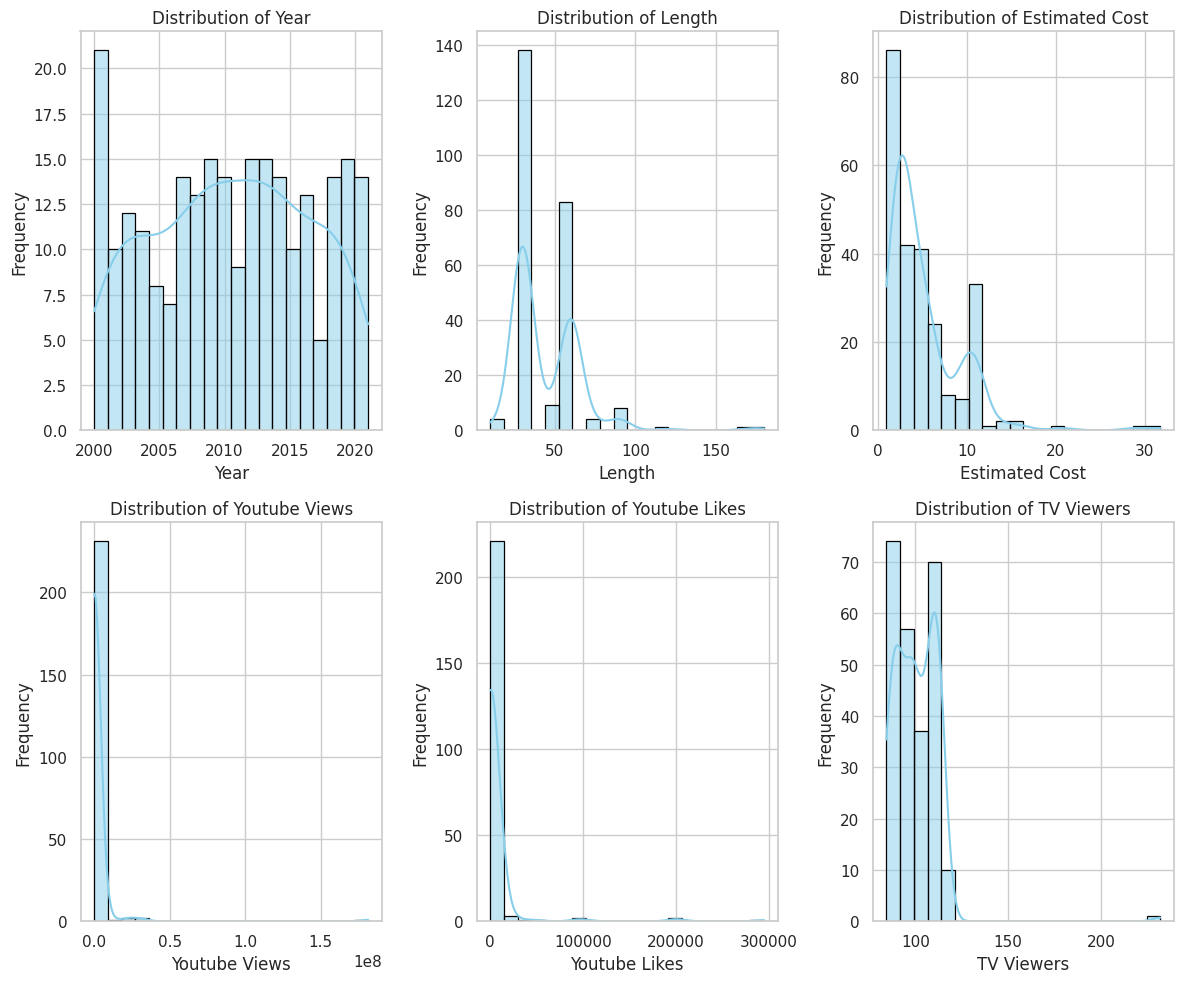

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd

file_path = '/content/sample_data/superbowl_commercials.csv'
data = pd.read_csv(file_path)

sns.set(style="whitegrid", palette="pastel")

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

n_cols = 3
n_rows_num = math.ceil(len(numerical_columns) / n_cols)
fig, axes = plt.subplots(n_rows_num, n_cols, figsize=(12, 5 * n_rows_num))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, color="skyblue", edgecolor="black", bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


BIVARIATE ANALYSIS


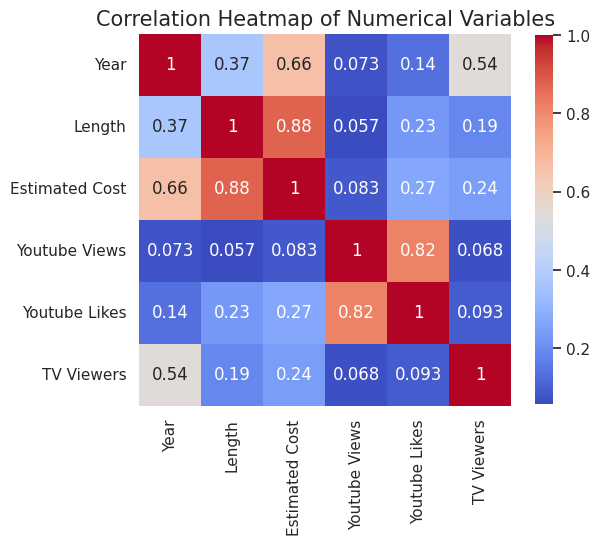

In [21]:
# Bivariate Analysis for Numerical-Numerical Relationships
# Correlation Matrix with a Colorful Heatmap
plt.figure(figsize=(6,6))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Numerical Variables', fontsize=15)
plt.show()



MULTIVARIATE ANALYSIS

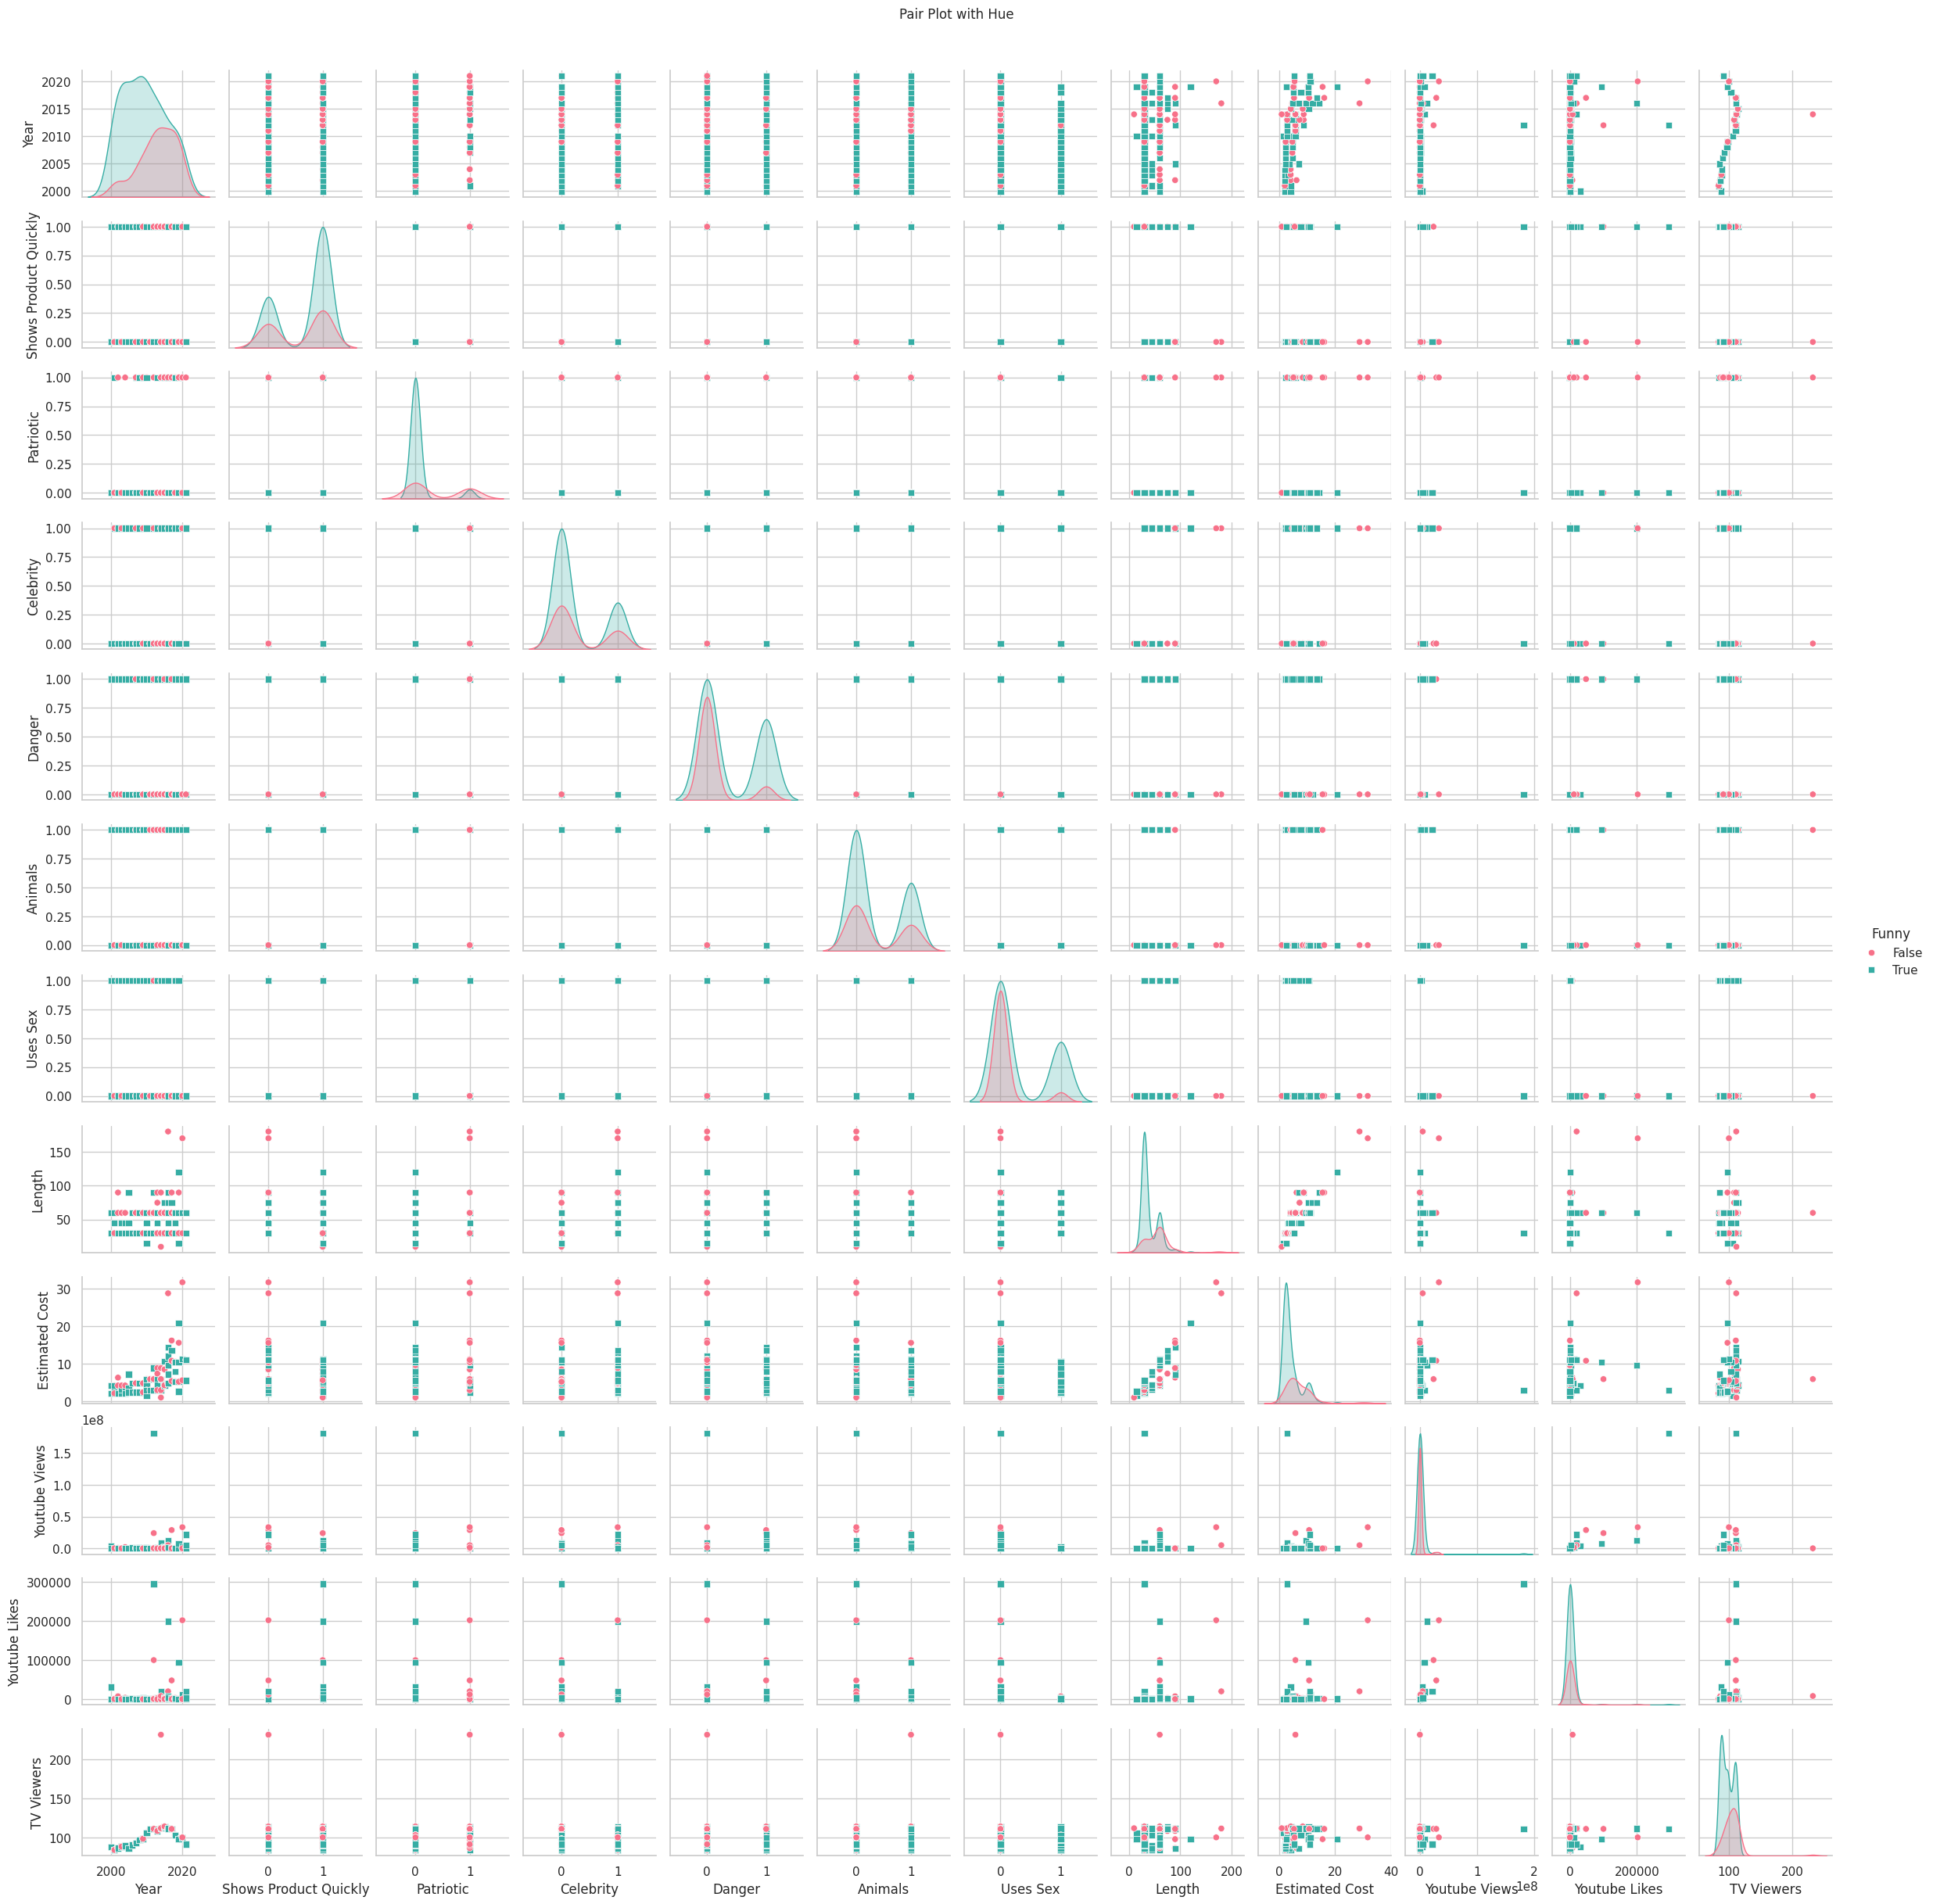

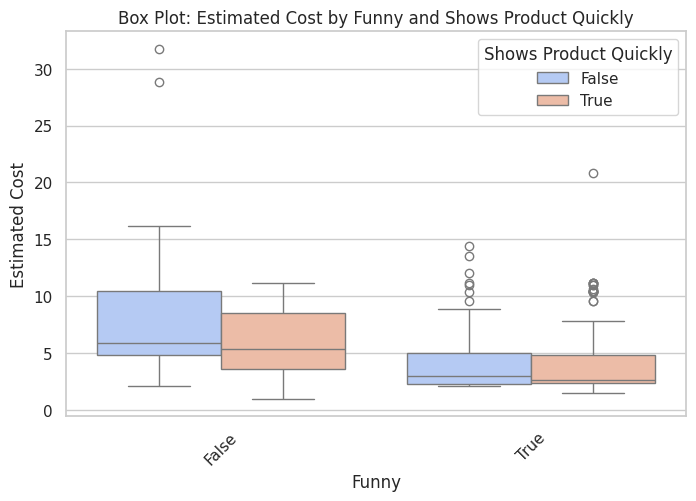

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('/content/sample_data/superbowl_commercials.csv')

numerical_columns = ['Year', 'Length', 'Estimated Cost', 'Youtube Views', 'Youtube Likes', 'TV Viewers']
categorical_columns = ['Brand', 'Funny', 'Shows Product Quickly', 'Patriotic', 'Celebrity', 'Danger', 'Animals', 'Uses Sex']


if len(categorical_columns) > 0:
    sns.pairplot(data, hue=categorical_columns[1], palette="husl", markers=["o", "s", "D"], diag_kind="kde", height=2)
    plt.suptitle("Pair Plot with Hue", y=1.02, fontsize=12)
    plt.show()


if len(categorical_columns) > 1:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x=categorical_columns[1], y=numerical_columns[2], hue=categorical_columns[2], palette="coolwarm", dodge=True)
    plt.title(f'Box Plot: {numerical_columns[2]} by {categorical_columns[1]} and {categorical_columns[2]}', fontsize=12)
    plt.xlabel(categorical_columns[1])
    plt.ylabel(numerical_columns[2])
    plt.xticks(rotation=45)
    plt.show()
